**1. Importing Libraries**

In [14]:
'Author: hernanda472@gmail.com'

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from matplotlib import colors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

**2. Loading Data**

In [15]:
df = pd.read_csv("Dataset.csv")
df

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,$80.22,$82.63,$80.07,$82.63,68230855,3.00424,-21.355713,86758820.0,$83.28,$81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,$83.28,$83.75,$80.18,$81.18,78616295,-2.52161,15.221032,68230855.0,$80.93,$79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,$80.93,$81.87,$79.72,$79.78,92380844,-1.42098,17.508519,78616295.0,$80.00,$79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,$80.00,$80.82,$78.33,$79.02,100521400,-1.22500,8.811952,92380844.0,$78.65,$76.78,-2.377620,54,0.594786


**3. Data Cleaning**

In [16]:
# To remove the NaN values
df.isnull().sum()

quarter                                0
stock                                  0
date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
percent_change_next_weeks_price        0
days_to_next_dividend                  0
percent_return_next_dividend           0
dtype: int64

In [17]:
# Removing the NaN values done
df['percent_change_volume_over_last_wk'].fillna('0', inplace=True)
df['previous_weeks_volume'].fillna('0', inplace=True)
df.isnull().sum()

quarter                               0
stock                                 0
date                                  0
open                                  0
high                                  0
low                                   0
close                                 0
volume                                0
percent_change_price                  0
percent_change_volume_over_last_wk    0
previous_weeks_volume                 0
next_weeks_open                       0
next_weeks_close                      0
percent_change_next_weeks_price       0
days_to_next_dividend                 0
percent_return_next_dividend          0
dtype: int64

In [18]:
# Get the new data, called df
df

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,0,0,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.3555,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,$80.22,$82.63,$80.07,$82.63,68230855,3.00424,-21.355713,86758820.0,$83.28,$81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,$83.28,$83.75,$80.18,$81.18,78616295,-2.52161,15.221032,68230855.0,$80.93,$79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,$80.93,$81.87,$79.72,$79.78,92380844,-1.42098,17.508519,78616295.0,$80.00,$79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,$80.00,$80.82,$78.33,$79.02,100521400,-1.22500,8.811952,92380844.0,$78.65,$76.78,-2.377620,54,0.594786


**4. Converting Data Type**

In [19]:
# Creating a copy of data
df2 = df.copy()
# Transform multiple floats to integer
df2 = df2.astype({'percent_change_price': int, 'percent_change_volume_over_last_wk': int, 'previous_weeks_volume': int, 'percent_change_next_weeks_price': int, 'percent_return_next_dividend': int})
# Get the new data from converting data, called df2
df2

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3,0,0,$16.71,$15.97,-4,26,0
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4,1,239655616,$16.19,$15.79,-2,19,0
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2,-43,242963398,$15.87,$16.13,1,12,0
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1,9,138428495,$16.18,$17.14,5,5,0
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5,1,151379173,$17.33,$17.37,0,97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,$80.22,$82.63,$80.07,$82.63,68230855,3,-21,86758820,$83.28,$81.18,-2,75,0
746,2,XOM,6/3/2011,$83.28,$83.75,$80.18,$81.18,78616295,-2,15,68230855,$80.93,$79.78,-1,68,0
747,2,XOM,6/10/2011,$80.93,$81.87,$79.72,$79.78,92380844,-1,17,78616295,$80.00,$79.02,-1,61,0
748,2,XOM,6/17/2011,$80.00,$80.82,$78.33,$79.02,100521400,-1,8,92380844,$78.65,$76.78,-2,54,0


**5. Data Selecting**

In [20]:
df3 = df2[['quarter', 'volume', 'percent_change_price', 'percent_change_volume_over_last_wk', 'percent_change_next_weeks_price', 'percent_return_next_dividend']]
df3

,quarter,volume,percent_change_price,percent_change_volume_over_last_wk,percent_change_next_weeks_price,percent_return_next_dividend
0,1,239655616,3,0,-4,0
1,1,242963398,-4,1,-2,0
2,1,138428495,-2,-43,1,0
3,1,151379173,1,9,5,0
4,1,154387761,5,1,0,0
...,...,...,...,...,...,...
745,2,68230855,3,-21,-2,0
746,2,78616295,-2,15,-1,0
747,2,92380844,-1,17,-1,0
748,2,100521400,-1,8,-2,0


**6. Data Preprocessing**

In [21]:
# Creating a copy of data
ds = df3.copy()
# Creating a subset of dataframe by dropping the features on percent change
cols_del = ["percent_change_price","percent_change_next_weeks_price", "percent_change_volume_over_last_wk"]
ds = ds.drop(cols_del, axis=1)
# Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns)
print("All features are now scaled")

All features are now scaled


**7. Dimensionality Reduction**

In [22]:
# Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["percent_change_price","percent_change_next_weeks_price", "percent_change_volume_over_last_wk"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
percent_change_price,750.0,1.515825e-16,1.025954,-1.236756,-1.098766,0.307060,0.486858,5.383834
percent_change_next_weeks_price,750.0,-3.789561e-17,1.012564,-2.528297,-0.124658,0.053550,0.271993,5.260162
percent_change_volume_over_last_wk,750.0,-3.789561e-17,0.962360,-1.243311,-1.051503,0.086983,0.495168,3.969747


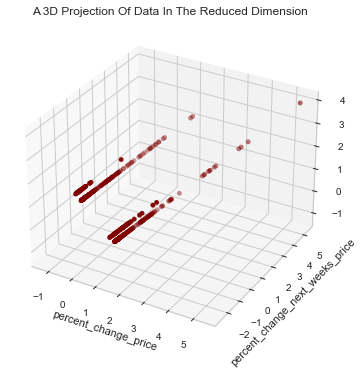

In [23]:
# A 3D projection of data in the reduced dimension
x =PCA_ds["percent_change_price"]
y =PCA_ds["percent_change_next_weeks_price"]
z =PCA_ds["percent_change_volume_over_last_wk"]
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.xlabel('percent_change_price')
plt.ylabel('percent_change_next_weeks_price')
plt.show()

**8. Clustering**

Elbow Method to determine the number of clusters to be formed:


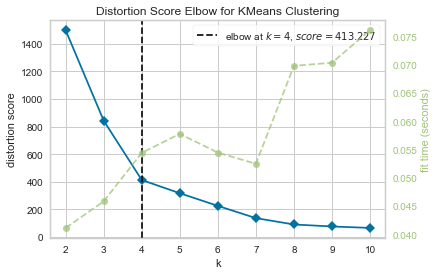

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
# Quick examination of elbow method to find numbers of clusters to make
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

C:\Users\Nanda\AppData\Local\Temp\ipykernel_15560\1355899707.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Clusters"]= yhat_AC


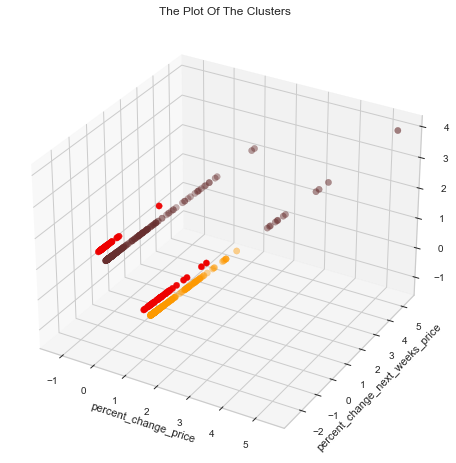

In [25]:
# Initiating the agglomerative clustering model 
AC = AgglomerativeClustering(n_clusters=3)
# Fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
# Adding the clusters feature to the orignal dataframe
df3["Clusters"]= yhat_AC
# Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
pal = ["#682F2F","#EE0000", "#FF9900"]
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = colors.ListedColormap(pal))
ax.set_title("The Plot Of The Clusters")
plt.xlabel('percent_change_price')
plt.ylabel('percent_change_next_weeks_price')
plt.show()

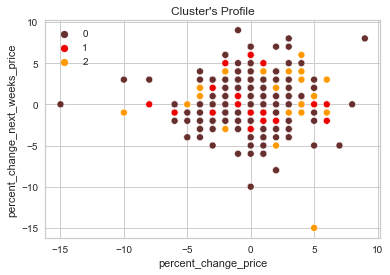

In [26]:
pl = sns.scatterplot(x = df3["percent_change_price"], y = df3["percent_change_next_weeks_price"], hue = df3["Clusters"], palette = pal)
pl.set_title("Cluster's Profile")
plt.legend()
plt.show()